In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection

import tensorflow as tf
from tensorflow import keras

# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical

%matplotlib inline

In [134]:
categorical_attributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
target_variable = ['class']

a) Učitati podatke iz datoteke `car.csv` za problem klasifikacije. Prikazati referentne statistike za atribute
koristeći `pandas` metod `describe`.

In [136]:
df = pd.read_csv('car.csv')
df.describe()
#df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


b) Kategoričke atribute enkodirati koristeći *dummy* enkodiranje.

In [150]:
X = df.drop('class', axis = 1)
#X.head()

X = pd.get_dummies(X)
#X.head()

y = df[['class']]
y['class'] = y['class'].map({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})
#y.head()

<ipython-input-150-653c814dcf17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map({'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3})


c) Učitane podatke razdvojiti u dva podskupa, $X$ gde se nalaze svi atributi bez ciljne promenljive `class`, i $y$ gde se
nalazi ciljna promenljiva `class`. Dozvoljeno je koristiti sve dostupne bibliotečke funkcije.

In [ ]:
# to je ovo gore

d) Podeliti podatke na skup za obučavanje i validaciju u razmeri 3:1. 

In [160]:
y = tf.keras.utils.to_categorical(y, 4)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75)
X_train.shape

(1296, 21)

e) Napraviti potpuno povezano neuronsku mrežu koja ima jedan skriveni sloj sa 32 neurona.

In [159]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Dense(32, activation='relu') )#, input_shape=(1,21)) )
model.add( tf.keras.layers.Dense(4, activation='softmax') )

f) Izvršiti obučavanje prethodno definisane mreže na 10 epoha sa veličinom podskupa 32. Kao grešku koristiti kategoričku kros entropiju, ostale parametre odabrati proizvoljno. Postaviti i podatke za validaciju.

In [175]:
epochs = 10
batch_size = 32

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs
         , validation_data=(X_test, y_test))

Epoch 1/10
41/41 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.9753 - val_loss: 0.1066 - val_accuracy: 0.9745
Epoch 2/10
41/41 [==============================] - 0s 826us/step - loss: 0.0952 - accuracy: 0.9745 - val_loss: 0.1052 - val_accuracy: 0.9699
Epoch 3/10
41/41 [==============================] - 0s 800us/step - loss: 0.0924 - accuracy: 0.9792 - val_loss: 0.1008 - val_accuracy: 0.9722
Epoch 4/10
41/41 [==============================] - 0s 825us/step - loss: 0.0897 - accuracy: 0.9792 - val_loss: 0.1015 - val_accuracy: 0.9769
Epoch 5/10
41/41 [==============================] - 0s 849us/step - loss: 0.0872 - accuracy: 0.9830 - val_loss: 0.0974 - val_accuracy: 0.9769
Epoch 6/10
41/41 [==============================] - 0s 826us/step - loss: 0.0853 - accuracy: 0.9807 - val_loss: 0.0957 - val_accuracy: 0.9769
Epoch 7/10
41/41 [==============================] - 0s 824us/step - loss: 0.0829 - accuracy: 0.9838 - val_loss: 0.0925 - val_accuracy: 0.9769
Epoch 8/

In [172]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 132       
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________


g) Nacrtati na istoj slici kako se menjala tačnost kroz epohe na skupovima za obučavanje i validaciju. Označiti u legendi šta označava koja linija.

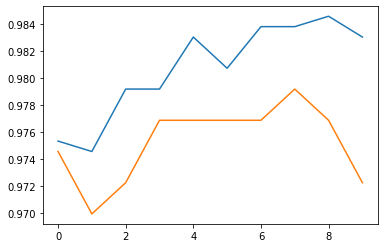

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

h) Testirati nekoliko verzija prethodne arhitekture tako što im se varira veličina skrivenog sloja (1, 2, 3, 10, 32, 64).
Obučiti svaki mrežu nad podacima za obučavanje i nacrtati kako se menjala tačnost kroz epohe nad skupovima za obučavanje i validaciju.
Koristiti iste parametre pri obučavanju kao u delu (e).

In [180]:
def build_network(layer_size):
    model = tf.keras.models.Sequential()
    model.add( tf.keras.layers.Dense(layer_size, activation='relu') )
    model.add( tf.keras.layers.Dense(4, activation='softmax') )
    return model

layer_sizes = [1, 2, 3, 10, 32, 64]
histories = []
for layer_size in layer_sizes:
    model = build_network(layer_size)
    model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs
                        , validation_data=(X_test, y_test))
    histories.append(history)
    print(f'modeli with {layer_size} layers is done')

Epoch 1/10
41/41 [==============================] - 0s 3ms/step - loss: 1.5111 - accuracy: 0.2986 - val_loss: 1.4354 - val_accuracy: 0.4213
Epoch 2/10
41/41 [==============================] - 0s 825us/step - loss: 1.4105 - accuracy: 0.4483 - val_loss: 1.3634 - val_accuracy: 0.5417
Epoch 3/10
41/41 [==============================] - 0s 775us/step - loss: 1.3459 - accuracy: 0.5556 - val_loss: 1.3149 - val_accuracy: 0.6296
Epoch 4/10
41/41 [==============================] - 0s 800us/step - loss: 1.2993 - accuracy: 0.6142 - val_loss: 1.2768 - val_accuracy: 0.6806
Epoch 5/10
41/41 [==============================] - 0s 775us/step - loss: 1.2622 - accuracy: 0.6605 - val_loss: 1.2434 - val_accuracy: 0.6921
Epoch 6/10
41/41 [==============================] - 0s 775us/step - loss: 1.2302 - accuracy: 0.6821 - val_loss: 1.2140 - val_accuracy: 0.7060
Epoch 7/10
41/41 [==============================] - 0s 775us/step - loss: 1.2016 - accuracy: 0.6898 - val_loss: 1.1868 - val_accuracy: 0.7106
Epoch 8/

Epoch 8/10
41/41 [==============================] - 0s 826us/step - loss: 0.2968 - accuracy: 0.8943 - val_loss: 0.3052 - val_accuracy: 0.8796
Epoch 9/10
41/41 [==============================] - 0s 824us/step - loss: 0.2718 - accuracy: 0.9020 - val_loss: 0.2807 - val_accuracy: 0.8773
Epoch 10/10
41/41 [==============================] - 0s 850us/step - loss: 0.2544 - accuracy: 0.9043 - val_loss: 0.2623 - val_accuracy: 0.8912
modeli with 64 layers is done


i) Nacrtati kako se menjala tačnost kroz epohe svih modela na skupu za obučavanje (1. slika) i skupu za validaciju (2. slika). Na slikama označiti koja linija označava koju verziju arhitekture.


In [ ]:
# ...